# **서울시 아동급식카드 가맹점 분포**

## **1.임포트 패키징** 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', family='Apple SD Gothic Neo')
plt.rc('axes', unicode_minus=True)
import glob
import seaborn as sns
import json
import os

## **1. 서론** 

저희는 2005년 이래 각 지자체에서 결식아동 급식사업의 일환으로 저소득층 아이들에게 발급하는 IC 카드인 아동급식카드에 대해 조사를 하였습니다. 아동 급식 카드의 정의로는 
경제적 빈곤 상태에 놓여 있는 가정의 자녀가 학교에서 급식을 먹지 못할 경우 학교 바깥에서 급식에 준하는 식사를 할 수 있도록 정부에서 보조하는 카드이다.
https://namu.wiki/w/%EC%95%84%EB%8F%99%EA%B8%89%EC%8B%9D%EC%B9%B4%EB%93%9C

현재 아동 급식카드 가맹점에 대해 소재구당 초등학교 수와  저소득층 통계를 통해 어떤 연관성을 보이는지 파악하고 이에 바탕으로 아동들이 자신의 폰을 가지고 편하게 가맹점을 찾을 수 있도록 가맹점 찾기 분포도를 제안하려고 합니다. 추가적으로 더 나아가 가맹점 찾기 분포도를 이용하여 정부 지차체이서 어떤 소재구가 가맹점 지원이 더 필요하며 소재구 학교에서 가맹점의 거리가 어느정도 되는지 바탕이 되는 자료가 될 수 있을 것입니다.

### 1-2. **가설 정의** 

저소득층 가구 통계와 초등학교수와 가맹점 수의 비율을 고려하여 위경도를 활용하여 분포도를 만든뒤 서울시 아동 급식카드 사업이 잘 운영될 수 있도록 효율적인 지원 도안을 생각해 보고 아이들을 위한 가맹점 찾기 어플의 바탕자료를 제안한다.

## **2. 선행 연구**

### **2-1. 현재 저소득층 소재구 통계 분석**

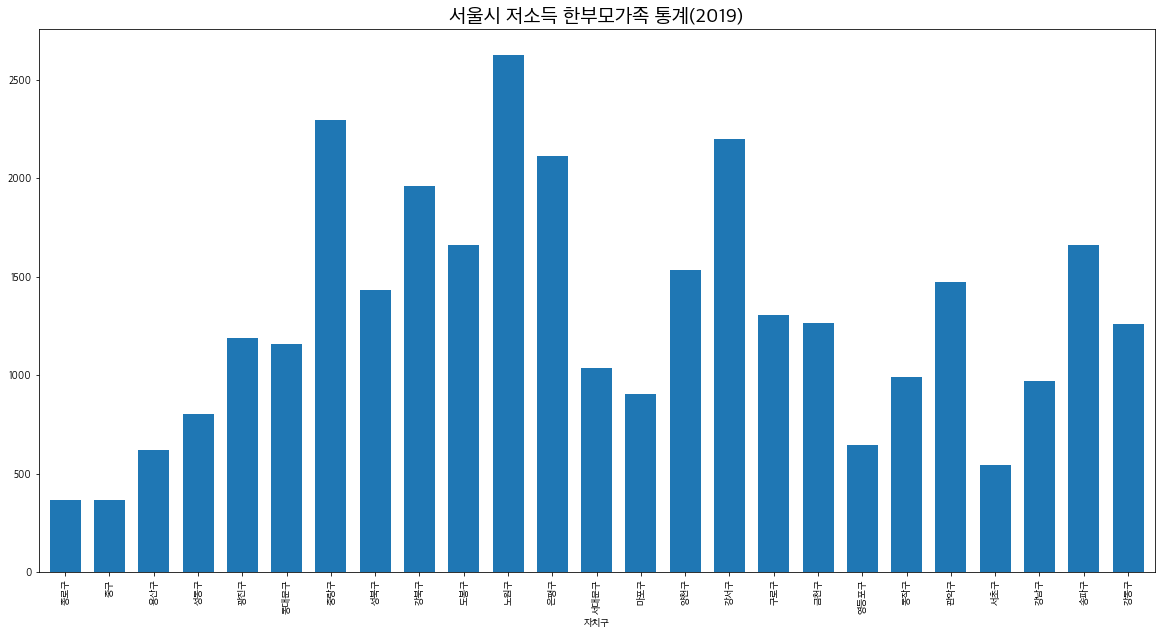

In [2]:
Low_income = pd.read_csv("/Users/dongwoo/무제 폴더/report.csv")
Low_income = Low_income.set_index('자치구')
Low_income
Low_income['가구수'].plot(kind='bar', figsize=(20,10), width=0.7)
plt.title('서울시 저소득 한부모가족 통계(2019)', size=20)
plt.show()

통계 자료를 보았을 때, 가장 저소득층 가구가 높은 소재구는 **상위 노원구 중랑구 강서구 은평구 강북구 순** 임을 알수 있었다.

### **2-2. 아동 급식카드 가맹점과 소재구 초등학교 수의 대한 연관성**

In [3]:
df_school = pd.read_csv("/Users/dongwoo/무제 폴더/서울교육통계시스템_학교일람표_초등학교현황.csv")
df_school = df_school[['소재구']]
df_school['소재구수'] = 1
df_school_count = df_school.groupby('소재구').sum()

In [4]:
df_food = pd.read_csv("/Users/dongwoo/무제 폴더/서울특별시 아동급식카드 가맹점 정보(2020.2).csv")
df_food_1 = df_food.dropna(subset=['가맹점주소'],how='any',axis=0)
df_food_2 = df_food_1.drop_duplicates(subset=['가맹점주소'])
df_food_2.drop(['전화'], axis=1, inplace=True)
df_food_2 = df_food_2.reset_index(drop=True)
df_food_2

/Users/dongwoo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,지역구,가맹점명,업종명,가맹점주소
0,종로구,국수나무창신점,한식,서울 종로구 지봉로 81 104호
1,종로구,김밥천국,한식,"서울 종로구 통일로 262, 1층 （무악동）"
2,종로구,꾸스꾸스,양식,서울 종로구 자하문로5길 16-2 （체부동）
3,종로구,나주식당,한식,서울 종로구 지봉로14길 8-1 지상1층
4,종로구,뚜레쥬르 창신점,제과점,서울 종로구 지봉로 91-1 （창신동）
...,...,...,...,...
1951,강동구,행복가득찬,식품잡화,서울 강동구 구천면로34길 17 1층
1952,강동구,행복한밥상,한식,서울 강동구 고덕로 133 지하층 1023호
1953,강동구,홍짜장,중식,"서울 강동구 양재대로116길 16, 104호 （길동, 고려빌딩）"
1954,강동구,홍짜장,한식,"서울 강동구 구천면로 418, 1층 （명일동）"


In [9]:
df_food_2
df_food_2 = df_food_2[['지역구']]
df_food_2['지역구수'] = 1

In [10]:
df_food_2_count = df_food_2.groupby('지역구').sum()

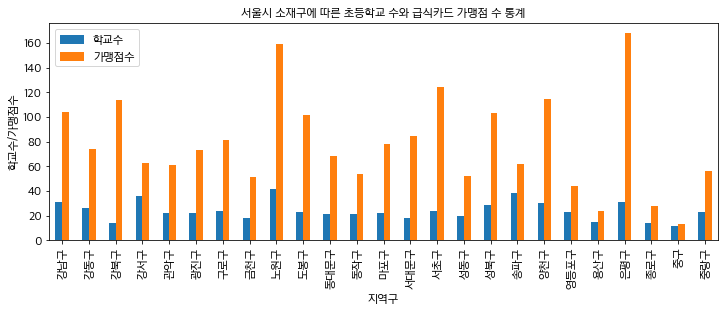

In [11]:
Seoul_fdlc= pd.concat([df_school_count,df_food_2_count], axis=1)
ax = Seoul_fdlc.plot(kind='bar', title='서울시 소재구에 따른 초등학교 수와 급식카드 가맹점 수 통계', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('지역구', fontsize=12)          # x축 정보 표시
ax.set_ylabel('학교수/가맹점수', fontsize=12)     # y축 정보 표시
ax.legend(['학교수', '가맹점수'], fontsize=12)    # 범례 지정

서울시 소재구에 따른 초등학교 수와 급식카드 가맹점 수 를 시각화하여 보았을 때, 가맹점 수는 **노원구와 은평구 서초구 양천구 강북구**가 가장 많으며
학교 수는 **노원구 송파구 은평구 강서구 강남구** 가 많은 것으로 알게되었다.

저소득 노원 중랑 강서 은평 강북
가맹점 노원 은평 서초 양천 강북
초등학 노원 송파 은평 강서 양천

노원구는 저소득 층 가구 수가 많으면서 초등학교수와 이에 맞게 가맹점 수가 높은 것으로 알 수 있었고 이에 은평구가 따르고 있음을 알수 있었습니다.



### **2-3. 아동 급식카드 가맹점의 종류 비율**

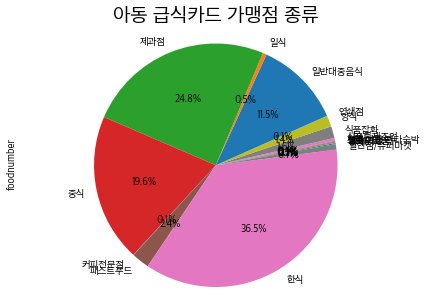

In [12]:
df_food = pd.read_csv("/Users/dongwoo/무제 폴더/서울특별시 아동급식카드 가맹점 정보(2020.2).csv")
df_food_1 = df_food_1.dropna(subset=['가맹점주소'],how='any',axis=0)
df_food_1 = df_food_1.drop_duplicates(subset=['가맹점주소'])
df_food_1.drop(['전화'], axis=1, inplace=True)
df_food_1 = df_food_1.reset_index(drop=True)

df_food_1['foodnumber'] = 1
df_food_type = df_food_1.groupby('업종명').sum()
df_food_type['foodnumber'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10)
plt.title('아동 급식카드 가맹점 종류', size=20)
plt.axis('equal')
plt.show()

보건복지부에서는 1 식 지원금액을 최소 4000 원으로 권고하고 있고, 서울시에서는 한 끼당 5000 원의 금액을 지원하며, 학교에서 지원하는 급식을 제외한 2 끼의 식사를 지원한다는 명목으로 하루에 10000 원의 사용 금액을 제한하고 있습니다.
https://www.google.co.kr/search?source=hp&ei=K5HLXrr5LMW9hwORpryYCg&q=%EC%84%9C%EC%9A%B8%EC%8B%9C+%EA%B8%89%EC%8B%9D%EC%B9%B4%EB%93%9C+%EA%B8%88%EC%95%A1&btnK=Google+%EA%B2%80%EC%83%89&oq=%EC%98%A4%EB%94%94%EC%98%A4+%EB%8D%B0%EC%9D%B4%ED%84%B0+%ED%8A%B8%EB%9E%98%ED%94%BD&gs_lcp=CgZwc3ktYWIQAzoFCAAQgwE6AggAOgQIABAeOgYIABAIEB46BggAEAUQHjoFCCEQoAE6BAghEBVQ5A9YzTJg2DNoCHAAeAOAAYsBiAGpFJIBBDAuMjKYAQCgAQGqAQdnd3Mtd2l6sAEA&sclient=psy-ab&ved=0ahUKEwj6uob_2s7pAhXF3mEKHRETD6MQ4dUDCAc&uact=5

## **3. 본 연구**

In [13]:
import folium

In [14]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map.save('/Users/dongwoo/무제 폴더/seoul.html')

In [15]:
import requests; from urllib.parse import urlparse
import pandas as pd
import geopandas

In [16]:
df_school = pd.read_csv("/Users/dongwoo/무제 폴더/서울교육통계시스템_학교일람표_초등학교현황.csv")
df_school = df_school.dropna(subset=['주소'], how='any', axis=0)
df_school = df_school[['소재구','학교명','주소']]
df_school

,소재구,학교명,주소
0,동대문구,서울군자초등학교,"서울특별시 동대문구 한천로6길 21 , 서울군자초등학교 (장안동,서울군자초등학교)"
1,동대문구,서울답십리초등학교,"서울특별시 동대문구 전농로3길 23 (답십리동,답십리초등학교)"
2,동대문구,서울동답초등학교,"서울특별시 동대문구 답십리로60길 12 (답십리동,서울동답초등학교)"
3,중랑구,서울동원초등학교,"서울특별시 중랑구 송림길 114 (망우동,동원초등학교)"
4,중랑구,서울망우초등학교,"서울 중랑구 망우로72길 49 (망우동,서울망우초교)"
...,...,...,...
594,성북구,대광초등학교,"서울특별시 성북구 안암로 5 (보문동7가,대광초등학교)"
595,성북구,매원초등학교,"서울특별시 성북구 북악산로 870 (돈암동,고명정보산업고등학교)"
596,성북구,성신초등학교,"서울특별시 성북구 북악산로 918 (돈암동,성신초등학교)"
597,강북구,영훈초등학교,"서울특별시 강북구 도봉로13가길 19 (미아동,학교법인영훈학원)"


In [17]:
def address_to_latlon(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json?&query=" + address
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK ea2cda9ed0237e674a4fb26236cfd4a4"})
    json_obj = result.json()
    for document in json_obj['documents']:
        global val 
        val= [document['road_address']['building_name'], document['address_name'], document['y'], document['x']]
    return val

In [18]:
# 주소 검색 함수 반복 적용
list = []
for address in df_school['주소']:
    list.append(address_to_latlon(address))
    
df_sc_1 = pd.DataFrame(list, columns = ['building_name', 'address_name', 'lat', 'lon'])
df_sc_1

,building_name,address_name,lat,lon
0,서울군자초등학교,서울 동대문구 한천로6길 21,37.5641223174494,127.060523298508
1,답십리초등학교,서울 동대문구 전농로3길 23,37.5688043221289,127.055427038114
2,서울동답초등학교,서울 동대문구 답십리로60길 12,37.5715014215127,127.06403409435
3,동원초등학교,서울 중랑구 송림길 114,37.6045782445697,127.104491305724
4,서울망우초교,서울 중랑구 망우로72길 49,37.5987369776708,127.103841751495
...,...,...,...,...
594,대광초등학교,서울 성북구 안암로 5,37.5791510372431,127.023445857158
595,"매원초,고명중,고명경영고",서울 성북구 북악산로 870,37.5976746822279,127.019186925653
596,"성신초등학교,성신여자중학교",서울 성북구 북악산로 918,37.5946231286898,127.023128450419
597,영훈학교,서울 강북구 도봉로13가길 19,37.6146818749027,127.02809331872


In [19]:
df_sc_1['building_name'] = df_school['학교명']

In [20]:
df_sc_1

,building_name,address_name,lat,lon
0,서울군자초등학교,서울 동대문구 한천로6길 21,37.5641223174494,127.060523298508
1,서울답십리초등학교,서울 동대문구 전농로3길 23,37.5688043221289,127.055427038114
2,서울동답초등학교,서울 동대문구 답십리로60길 12,37.5715014215127,127.06403409435
3,서울동원초등학교,서울 중랑구 송림길 114,37.6045782445697,127.104491305724
4,서울망우초등학교,서울 중랑구 망우로72길 49,37.5987369776708,127.103841751495
...,...,...,...,...
594,대광초등학교,서울 성북구 안암로 5,37.5791510372431,127.023445857158
595,매원초등학교,서울 성북구 북악산로 870,37.5976746822279,127.019186925653
596,성신초등학교,서울 성북구 북악산로 918,37.5946231286898,127.023128450419
597,영훈초등학교,서울 강북구 도봉로13가길 19,37.6146818749027,127.02809331872


In [21]:
# df_sc_1.to_csv('/Users/dongwoo/무제 폴더/school_location.csv')

In [23]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map.save('/Users/dongwoo/무제 폴더/seoul.html')

for name, lat, lng in zip(df_sc_1.building_name, df_sc_1.lat, df_sc_1.lon):
    folium.Marker([lat,lng], popup=name).add_to(seoul_map)
    
seoul_map.save('./seoul.html')

### 3-2. 가맹점 위치 등록하기 

In [24]:
df_food = pd.read_csv("/Users/dongwoo/무제 폴더/서울특별시 아동급식카드 가맹점 정보(2020.2).csv")
df_food = df_food.dropna(subset=['가맹점주소'],how='any',axis=0)
df_food = df_food.dropna(subset=['가맹점명'],how='any',axis=0)
df_food = df_food.drop_duplicates(subset=['가맹점주소'])
df_food = df_food.reset_index(drop=True)
df_food
df_food['가맹점주소_약'] = df_food.가맹점주소.apply(lambda x: x.split(',')[0])

In [25]:
df_food.drop(['전화'], axis=1, inplace=True)
df_food.drop(['업종명'], axis=1, inplace=True)
df_food.drop(['가맹점주소'], axis=1, inplace=True)
df_food

,지역구,가맹점명,가맹점주소_약
0,종로구,국수나무창신점,서울 종로구 지봉로 81 104호
1,종로구,김밥천국,서울 종로구 통일로 262
2,종로구,꾸스꾸스,서울 종로구 자하문로5길 16-2 （체부동）
3,종로구,나주식당,서울 종로구 지봉로14길 8-1 지상1층
4,종로구,뚜레쥬르 창신점,서울 종로구 지봉로 91-1 （창신동）
...,...,...,...
1951,강동구,행복가득찬,서울 강동구 구천면로34길 17 1층
1952,강동구,행복한밥상,서울 강동구 고덕로 133 지하층 1023호
1953,강동구,홍짜장,서울 강동구 양재대로116길 16
1954,강동구,홍짜장,서울 강동구 구천면로 418


In [26]:
df_food11 = df_food.head(106)
df_food11

,지역구,가맹점명,가맹점주소_약
0,종로구,국수나무창신점,서울 종로구 지봉로 81 104호
1,종로구,김밥천국,서울 종로구 통일로 262
2,종로구,꾸스꾸스,서울 종로구 자하문로5길 16-2 （체부동）
3,종로구,나주식당,서울 종로구 지봉로14길 8-1 지상1층
4,종로구,뚜레쥬르 창신점,서울 종로구 지봉로 91-1 （창신동）
...,...,...,...
101,성동구,중천,서울 성동구 무수막길 58
102,성동구,중화요리일미향,서울 성동구 장터5길 4-1
103,성동구,큰맘할매순대국 용답점,서울 성동구 용답29길 10 1층 （용답동）
104,성동구,파리바게뜨 마장대로점,서울 성동구 마장동 474-25번지 1층 지상 2층


In [27]:
def address_to_latlon(address): #주소를 위경도로 변환하는 함수
    url = "https://dapi.kakao.com/v2/local/search/address.json?&query=" + address
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK ea2cda9ed0237e674a4fb26236cfd4a4"}) 
    json_obj = result.json()
    for document in json_obj['documents']:
        global val 
        val= [document['address_name'], document['y'], document['x']]
    return val

In [29]:
list = []
for address in df_food['가맹점주소_약']:
    list.append(address_to_latlon(address))
    
df_foodlc = pd.DataFrame(list, columns = ['address_name', 'lat', 'lon'])

In [32]:
df_foodlc

,address_name,lat,lon
0,서울 강동구 진황도로 59-2,37.5375265971932,127.133757754392
1,서울 종로구 통일로 262,37.5755075085658,126.957025042288
2,서울 종로구 자하문로5길 16-2,37.5778610583485,126.971150371836
3,서울 종로구 지봉로14길 8-1,37.5781225502411,127.015888130368
4,서울 종로구 지봉로 91-1,37.5783262703945,127.015162170898
...,...,...,...
1951,서울 강동구 구천면로34길 17,37.5424550540243,127.132166000468
1952,서울 강동구 고덕로 133,37.5552528493133,127.140347239304
1953,서울 강동구 양재대로116길 16,37.5384040731489,127.141194244696
1954,서울 강동구 구천면로 418,37.5505129007445,127.14502941322


In [33]:
df_foodlc = df_foodlc.sort_values(by='address_name' ,ascending=False)
df_foodlc = df_foodlc.reset_index(drop=True)
df_food = df_food.sort_values(by='가맹점주소_약' ,ascending=False)
df_food = df_food.reset_index(drop=True)
food_data = pd.concat([df_food,df_foodlc], axis=1)
food_data

,지역구,가맹점명,가맹점주소_약,address_name,lat,lon
0,중랑구,파리바게뜨 중화역점,서울 중랑구 중화2동 303-1번지,서울 중랑구 중화2동 303-1,37.6013538612483,127.079141126678
1,중랑구,김밥천국,서울 중랑구 중랑역로 86,서울 중랑구 중랑역로 86,37.6010347417061,127.078041771622
2,중랑구,성이네천원김밥,서울 중랑구 중랑역로 150 중화아파트 1동 105호（묵동）,서울 중랑구 중랑역로 150,37.6067497606088,127.077159967487
3,중랑구,경보장,서울 중랑구 용마산로96길 15,서울 중랑구 용마산로96길 15,37.5903625993181,127.09840193998
4,중랑구,세븐돈까스,서울 중랑구 용마산로 557,서울 중랑구 용마산로 557,37.6006970374489,127.100246556563
...,...,...,...,...,...,...
1951,강남구,만리장성,서울 강남구 개포동 12번지 대치지구2단지종합상가 지층 1호,서울 강남구 개포동 12-4,37.4926948167159,127.075628436058
1952,강남구,김밥천국,서울 강남구 개포동 12-4번지 석탑프라자지상 1층 123호 124호,서울 강남구 개포동 12,37.4941848052623,127.075215384158
1953,강남구,파리바게뜨 개포점,서울 강남구 개포3동 186-4 지상1,서울 강남구 개포2동 186-4,37.4886377509428,127.067776325003
1954,강남구,사보르,서울 강남구 개포3동 186-10 지상1층,서울 강남구 개포2동 186-10,37.4889484602125,127.068017111864


In [34]:
for name, lat, lng in zip(food_data.가맹점명, food_data.lat, food_data.lon):
    folium.CircleMarker([lat,lng],
                       radius=10,
                       color='brown',
                       fill=True,
                       fill_color='coral',
                       fill_opacity=0.7,
                       popup=name
    ).add_to(seoul_map)
    
seoul_map.save('./seoul.html')

### 3-3. 점포 별 반경 100m 서클 시각화 

In [35]:
seoul_map_100 = folium.Map(location=[37.55,126.98], zoom_start=90)
seoul_map_100.save('/Users/dongwoo/무제 폴더/seoul_100m.html')

In [36]:
m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=90
)

for name, lat, lng in zip(food_data.가맹점명, food_data.lat, food_data.lon):
    folium.CircleMarker([lat,lng],
                       radius=50,
                       color='blue',
                       fill_color='gray',
                       fill_opacity=0.1,
                       popup=name
    ).add_to(seoul_map_100)
    
seoul_map_100.save('./seoul_100m.html')

In [37]:
m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=90
)

for name, lat, lng in zip(df_sc_1.building_name, df_sc_1.lat, df_sc_1.lon):
    folium.CircleMarker([lat,lng],
                       radius=50,
                       color='yellow',
                       fill_color='gray',
                       fill_opacity=0.1,
                       popup=name
    ).add_to(seoul_map_100)
    
seoul_map_100.save('./seoul_100m.html')